--- Step 1: Synthetic Data Generated Successfully ---
     Rainfall  Temperature Soil_Type       Yield
0  524.724071    28.963234     Sandy  288.842767
1  870.428584    25.721927      Clay  450.828032
2  739.196365    21.190552     Sandy  338.991892
3  659.195091    31.275900     Sandy  369.396542
4  393.611184    28.694623     Loamy  309.960511


--- Step 2: Preprocessing and Splitting Complete ---
Training set size: 400
Testing set size: 100


--- Step 3: Model Training Complete ---

--- Step 4: Model Evaluation ---
Root Mean Squared Error (RMSE): 25.69 (units of yield)
R-squared (R2) Value: 0.8351

Scatter plot saved as 'yield_prediction_scatter.png'

--- Analysis Complete ---


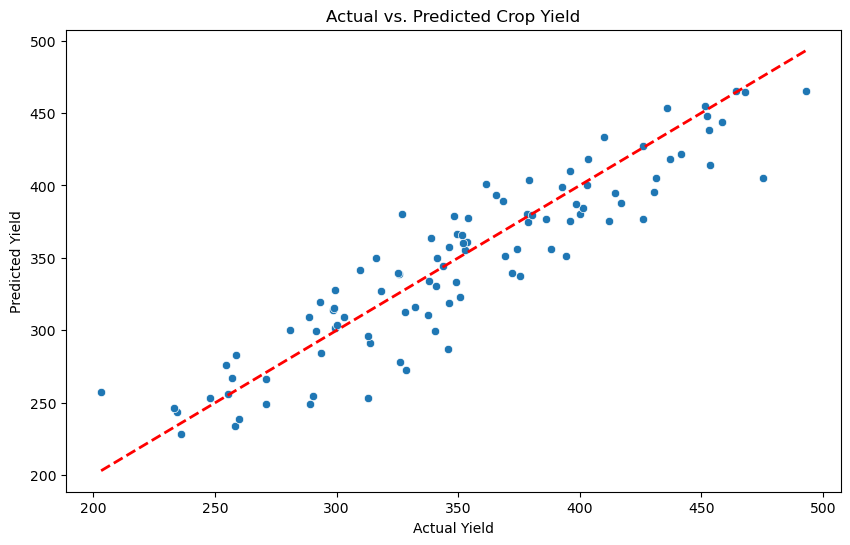

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # --- Step 1: Generate a Realistic Dataset ---
    # No download needed! We create the data ourselves.
    np.random.seed(42) # for reproducibility
    num_samples = 500

    # Generate features
    rainfall = np.random.uniform(300, 900, num_samples) # in mm
    temperature = np.random.uniform(15, 35, num_samples) # in Celsius
    soil_types = ['Loamy', 'Clay', 'Sandy']
    soil_type = np.random.choice(soil_types, num_samples)

    # Create a DataFrame
    df = pd.DataFrame({
        'Rainfall': rainfall,
        'Temperature': temperature,
        'Soil_Type': soil_type
    })
    
    # Create the target variable (Yield) with a defined relationship
    # Base yield + effect of rain + effect of temp + effect of soil + random noise
    soil_effect = df['Soil_Type'].apply(lambda x: {'Loamy': 20, 'Clay': -10, 'Sandy': -30}.get(x))
    noise = np.random.normal(0, 25, num_samples) # Add some randomness
    df['Yield'] = 150 + (df['Rainfall'] * 0.3) + (df['Temperature'] * 1.2) + soil_effect + noise
    
    print("--- Step 1: Synthetic Data Generated Successfully ---")
    print(df.head())
    print("\n")

    # --- Step 2: Preprocess the Data ---
    # Handle the categorical 'Soil_Type' feature with One-Hot Encoding
    df = pd.get_dummies(df, columns=['Soil_Type'], drop_first=True)
    
    # Split data into features (X) and target (y)
    X = df.drop('Yield', axis=1)
    y = df['Yield']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print("--- Step 2: Preprocessing and Splitting Complete ---")
    print("Training set size:", X_train.shape[0])
    print("Testing set size:", X_test.shape[0])
    print("\n")

    # --- Step 3: Train the Linear Regression Model ---
    model = LinearRegression()
    model.fit(X_train, y_train)
    print("--- Step 3: Model Training Complete ---\n")

    # --- Step 4: Evaluate the Model ---
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print("--- Step 4: Model Evaluation ---")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f} (units of yield)")
    print(f"R-squared (R2) Value: {r2:.4f}")
    
    # Visualize the predictions
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual Yield")
    plt.ylabel("Predicted Yield")
    plt.title("Actual vs. Predicted Crop Yield")
    plt.savefig('yield_prediction_scatter.png')
    print("\nScatter plot saved as 'yield_prediction_scatter.png'")
    print("\n--- Analysis Complete ---")

except Exception as e:
    print(f"An error occurred: {e}")